# Airline passenger satisfaction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam

## Project Goal:

Predict satisfaction of airline customers based on predictors describing both flight conditions as well as customer features.

## Dataset Description:

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Data processing

### Loading the dataset

In [ ]:
#Load the train dataset
df_train = pd.read_csv("train.csv")
df_train = df_train.drop("Unnamed: 0", axis=1)

#Load the test dataset
df_test = pd.read_csv("test.csv")
df_test = df_test.drop("Unnamed: 0", axis=1)

#Merging the two datasets
full_df = result = pd.concat([df_train,df_test])

In [ ]:
full_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Information about the dataset

In [ ]:
full_df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**We can see that the range of the values are quite reasonable. There don't seem to be any outliers in the dataset.**

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     12988

**We can see that most of the columns are integers. Indeed, in the survey, people often had to answer on a five points rating scale. Some of them are floating numbers, and some of them are object. We are going to look at the dataset in more details to see if it is feasible to convert the "object" columns to columns that are understandable by machine learning algorithms.**

In [ ]:
full_df.nunique()

id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              466
Arrival Delay in Minutes        

**The "object" columns only take few unique values. This is good, as it means that we can easily perform encoding on these columns. We are going to do one-hot-encoding to convert these categorical features to columns that are understandable for the algorithm.**

### Encoding the categorical variables

In [ ]:
#Columns that we want to encode
to_convert = ['Gender','Customer Type','Type of Travel','Class']

#Encoding the variable that we want to predict
full_df['satisfaction'] = (full_df['satisfaction']=='satisfied').astype(int)
# full_df = full_df.drop('satisfaction',axis=1)

#Encoding the categorical features
full_processed_df = pd.get_dummies(full_df, columns=to_convert, drop_first=True)

In [ ]:
#Getting X and y
y = full_processed_df['satisfaction']
X = full_processed_df.drop('satisfaction',axis=1)

### Scaling the data

In [ ]:
# separate categorical and quantitative features

predictors = full_processed_df.columns.tolist()
cat = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
'Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco',
'Class_Eco Plus']
quant = [i for i in predictors if i not in cat]
quant.remove('id')
quant.remove('satisfaction')

X_scaled = X.copy()

# Standardization of quant features
scaler = StandardScaler()
X_scaled[quant] = scaler.fit_transform(X_scaled[quant])

### Imputing the missing values

In [ ]:
missing = full_df.isnull().sum()
missing

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

**We can see that we have missing values for the column "Arrival Delay in Minutes". We will have to handle these missing values for our model**

In [ ]:
 imputer = KNNImputer(n_neighbors=2)
X_scaled = pd.DataFrame(imputer.fit_transform(X_scaled),columns = X_scaled.columns)
X_scaled.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,70172.0,-1.747961,-0.732184,3.0,4.0,3.0,1.0,5.0,3.0,5.0,...,4.0,5.0,5.0,0.270187,0.075623,1.0,0.0,1.0,0.0,1.0
1,5047.0,-0.954274,-0.957760,3.0,2.0,3.0,3.0,1.0,3.0,1.0,...,1.0,4.0,1.0,-0.360214,-0.236345,1.0,1.0,0.0,0.0,0.0
2,110028.0,-0.888133,-0.048440,2.0,2.0,2.0,2.0,5.0,5.0,5.0,...,4.0,4.0,5.0,-0.386481,-0.392329,0.0,0.0,0.0,0.0,0.0
3,24026.0,-0.954274,-0.629924,2.0,5.0,5.0,5.0,2.0,2.0,2.0,...,1.0,4.0,2.0,-0.097547,-0.158353,0.0,0.0,0.0,0.0,0.0
4,119299.0,1.426788,-0.978814,3.0,3.0,3.0,3.0,4.0,5.0,5.0,...,3.0,3.0,3.0,-0.386481,-0.392329,1.0,0.0,0.0,0.0,0.0


## Exploratory data analysis

### Class Imbalance

0    73452
1    56428
Name: satisfaction, dtype: int64

We will use a threshold value of 0.43446258084385586 to account for class imbalance.


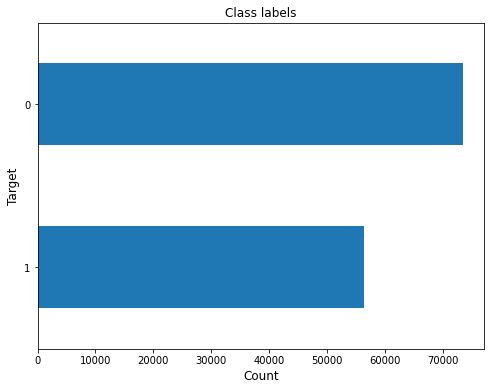

In [ ]:
# Class imbalance

display(full_processed_df['satisfaction'].value_counts())
plt.figure(figsize = (8,6))
full_df.satisfaction.value_counts().sort_values().plot(kind = 'barh')
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Target', fontsize = 12)
plt.title('Class labels', fontsize = 12)

# threshold to account for class imbalance
threshold = full_df['satisfaction'].mean()
print(f"We will use a threshold value of {threshold} to account for class imbalance.")

**From the above barplot, we note that we have around 23% count difference between 'satisfied' labels (label 1) and 'dissatisfied or neutral' labels. The custom threshold will help us deal with this class imbalance.**

### Feature correlation

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

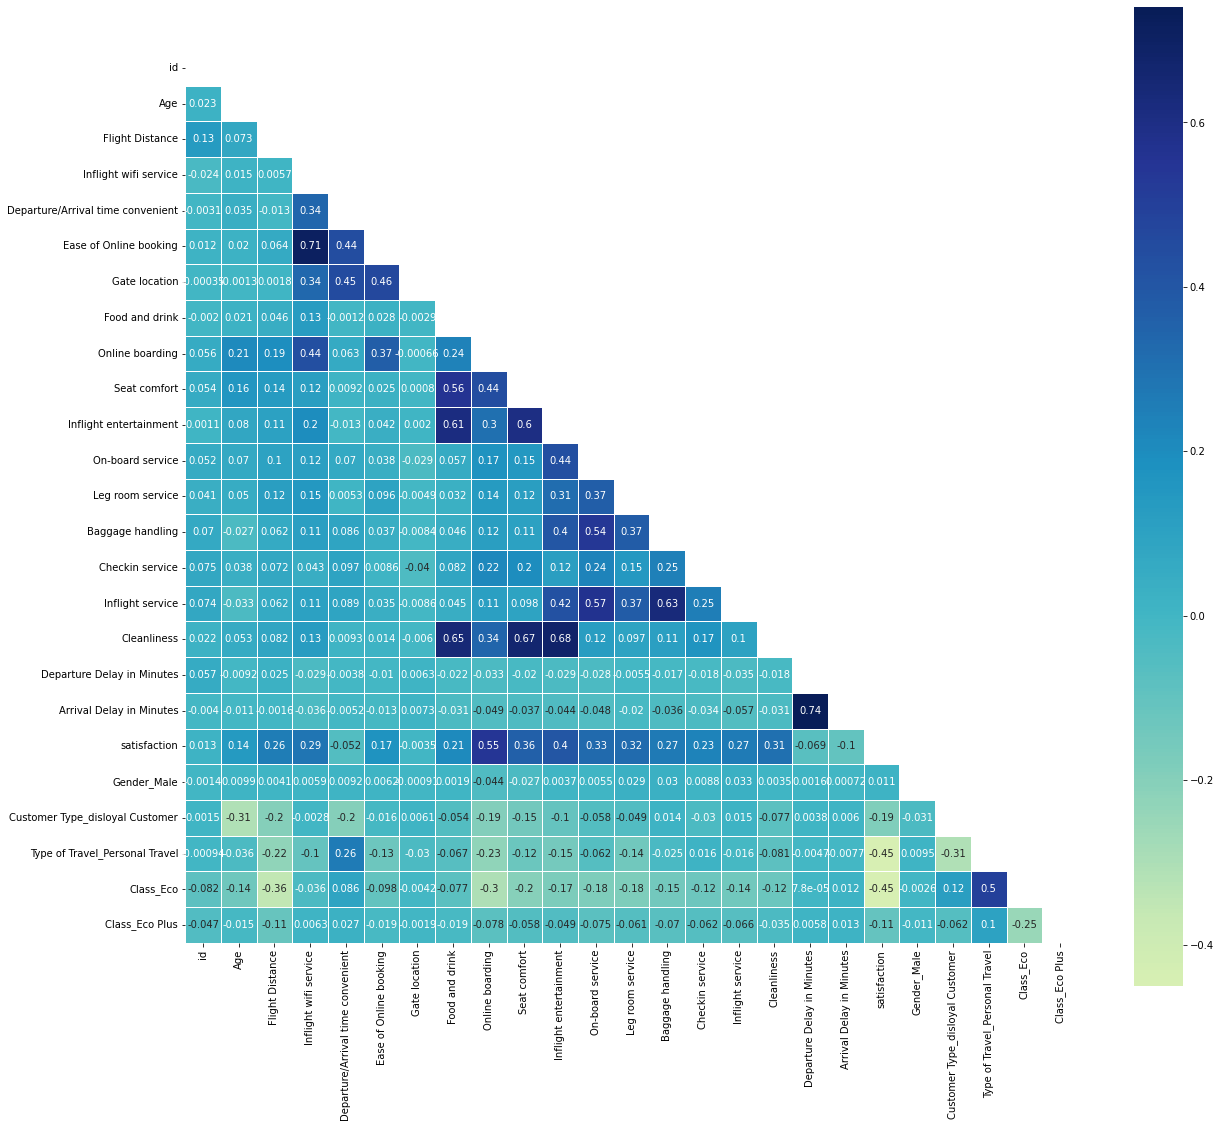

In [ ]:
#Correlation matrix between all the columns
corr = full_processed_df.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 18))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

**We notice strong positve correlations between some of the predictors. Let us look at that in more details as it could impact our performance on linear models.**

In [ ]:
# Highly correlated predictors
corr.where(np.triu(np.abs(corr) > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes      Arrival Delay in Minutes    0.740284
Inflight wifi service           Ease of Online booking      0.710948
Inflight entertainment          Cleanliness                 0.680963
Seat comfort                    Cleanliness                 0.667978
Food and drink                  Cleanliness                 0.647080
Baggage handling                Inflight service            0.630642
Food and drink                  Inflight entertainment      0.610895
Seat comfort                    Inflight entertainment      0.604704
On-board service                Inflight service            0.569414
Food and drink                  Seat comfort                0.558318
Online boarding                 satisfaction                0.549520
On-board service                Baggage handling            0.536600
Type of Travel_Personal Travel  Class_Eco                   0.501083
dtype: float64

**Some of the above seem to be correlated by pure coincidence like 'Inflight wifi service' and 'Ease of Online booking', which should not be naturally related. On the other hand, it is easy to understand why Departure Delay in Minutes and Arrival Delay in Minutes would be highly correlated, since the former would most likely be linearly related to the latter.**

### Feature distribution

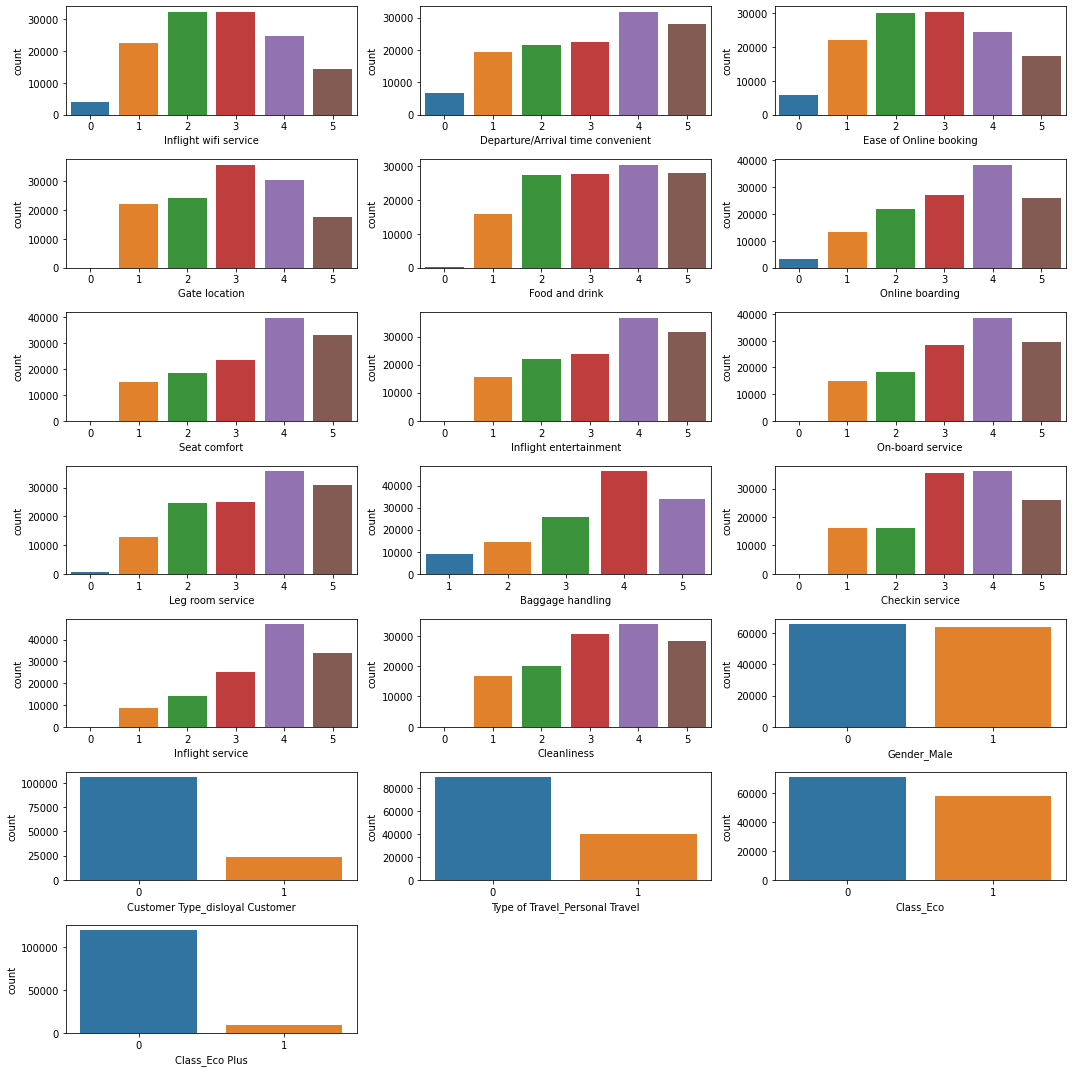

In [ ]:
# Feature distributions
# categorical 
fig, axes = plt.subplots(7, 3, figsize = (15, 15))
for i, x in enumerate(cat):
    sns.countplot(ax=axes[i//3, i%3],x=x,data=full_processed_df)

fig.delaxes(axes[6][1])
fig.delaxes(axes[6][2])
fig.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


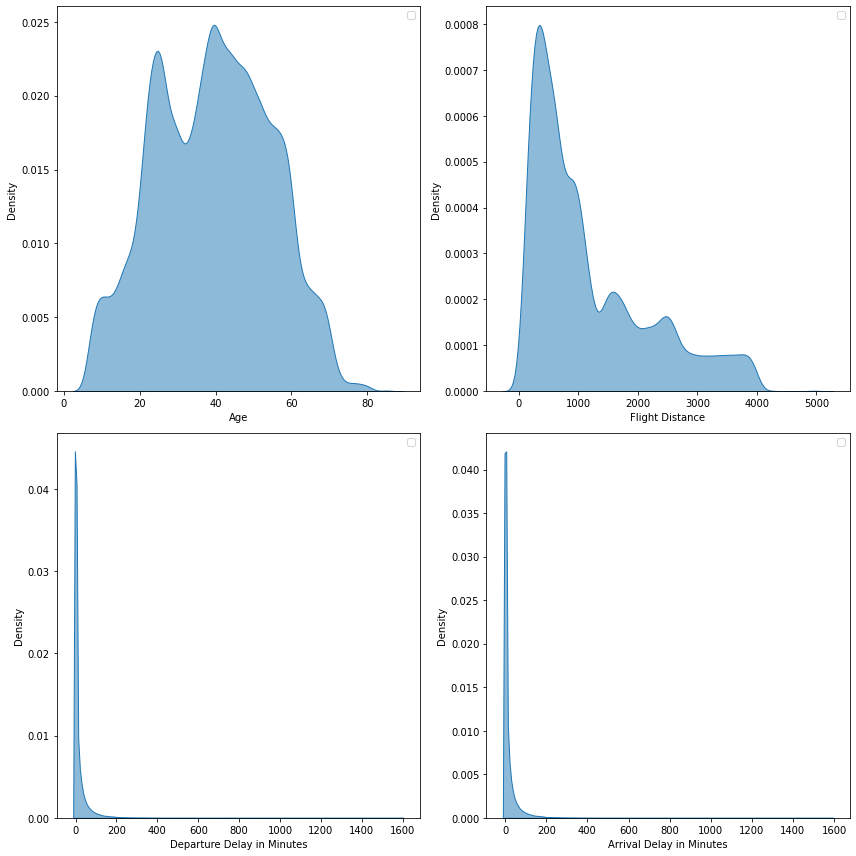

In [ ]:
# Numerical data

# delete duplicated indices
temp_df = full_processed_df.loc[~full_processed_df.index.duplicated(), :]

fig, axs = plt.subplots(2, 2, figsize = (12, 12))
axs = axs.ravel()
for i, x in enumerate(quant):
    sns.kdeplot(data=temp_df,x=x,ax=axs[i],fill=True, palette="crest", alpha=.5)
    axs[i].set_xlabel(x)
    axs[i].legend()

fig.tight_layout()
plt.show()    

### Target vs Predictors Distribution

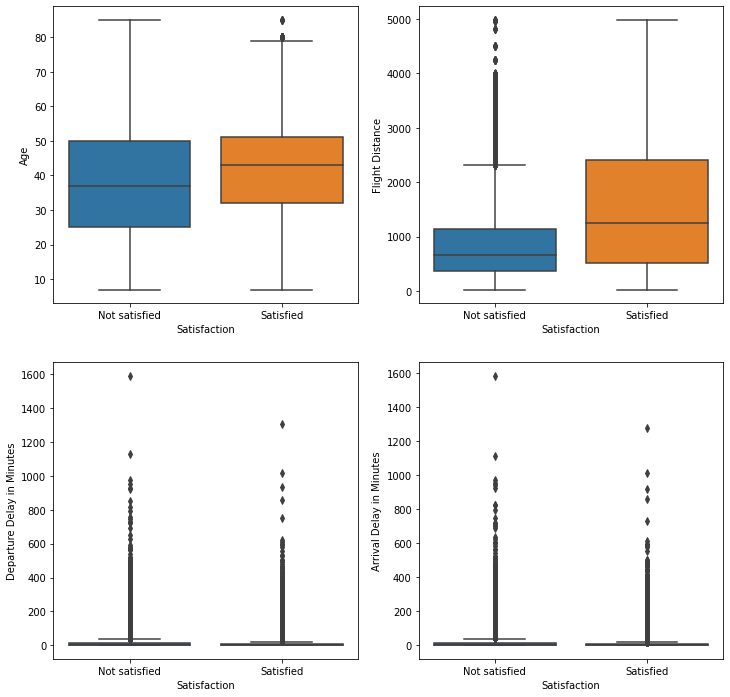

In [ ]:
# numerical data
fig, axs = plt.subplots(2,2,figsize=(12,12))
axs = axs.ravel()
for i, x in enumerate(quant):

      sns.boxplot(data=full_processed_df,x='satisfaction',y=x,ax=axs[i])
      x_ticks = [0,1]
      x_labels = ['Not satisfied', 'Satisfied']
      axs[i].set_xlabel('Satisfaction')
      axs[i].set_xticks(x_ticks)
      axs[i].set_xticklabels(x_labels)

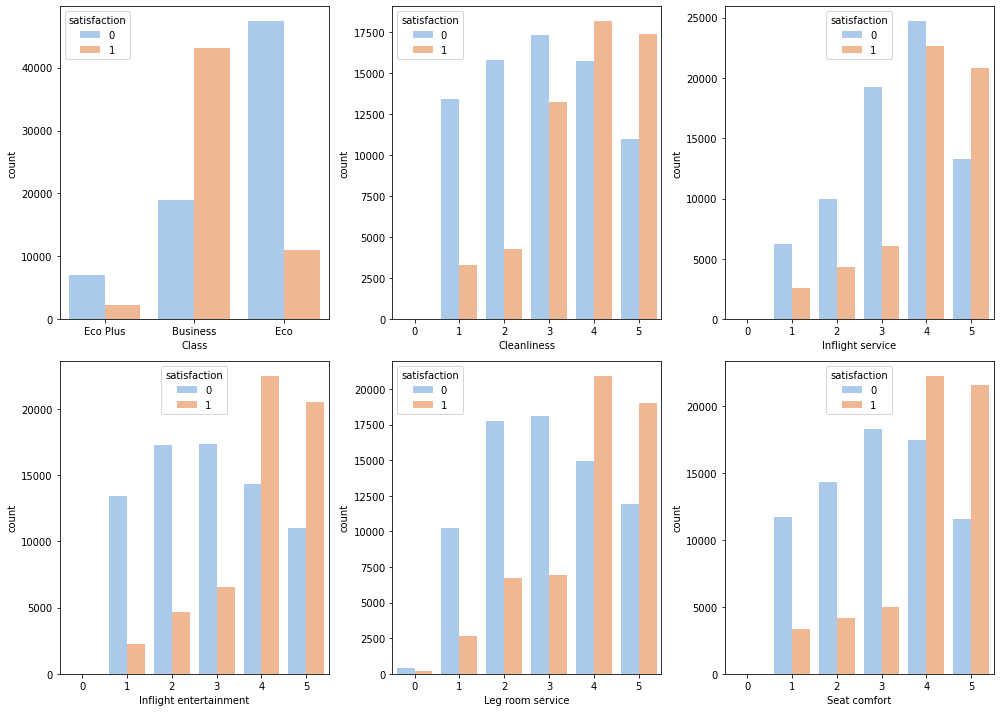

In [ ]:
# Categorical data: Class, Cleanliness, Inflight service, Inflight entertainment, Leg room service, Seat comfort
col = ['Class', 'Cleanliness', 'Inflight service', 'Inflight entertainment', 'Leg room service', 'Seat comfort']

fig, axs = plt.subplots(2, 3, figsize = (14,10))
axs = axs.ravel()
for i, x in enumerate(col):
    sns.countplot(x = x, hue = 'satisfaction', palette = "pastel", data = full_df, ax = axs[i])

fig.tight_layout()

## Data Split: Train/Val/Test

In [ ]:
X = X_scaled
X_train_big, X_test, y_train_big, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train_big, y_train_big, test_size = 0.2, random_state = 1)

In [ ]:
print(f"Current number of features: {len(X_train.columns.tolist())}")

Current number of features: 24


In [ ]:
# # Create an SelectKBest object to select features with best ANOVA F-Values
# k = 18 # tune after modeling if needed
# fval_select = SelectKBest(f_classif, k=k)

# # Apply the SelectKBest object to the features and target
# X_kbest = fval_select.fit(X_train, y_train)
# cols = X_kbest.get_support(indices=True)
# X_train_select = X_train.iloc[:,cols]
# X_val_select = X_val.iloc[:,cols]
# X_test_select = X_test.iloc[:,cols]
# X_train_select.head()

In [ ]:
# print(f"Original columns: {X_train.columns.tolist()}\n")
# print(f"Columns after feature selection: {X_train_select.columns.tolist()}")
# print(f"Least important features: {[i for i in X_train.columns if i not in X_train_select.columns]}")

In [ ]:
# # Standardization of quant features
# quant_select = [i for i in quant if i not in [i for i in X_train.columns if i not in X_train_select.columns]]
# scaler = StandardScaler()
# X_train_select[quant_select] = scaler.fit_transform(X_train_select[quant_select])
# X_val_select[quant_select] = scaler.transform(X_val_select[quant_select])
# X_test_select[quant_select] = scaler.transform(X_test_select[quant_select])

## Modeling

In [ ]:
# # Standardization of quant features
# scaler = StandardScaler()
# X_train[quant] = scaler.fit_transform(X_train[quant])
# X_val[quant] = scaler.transform(X_val[quant])
# X_test[quant] = scaler.transform(X_test[quant])

In [ ]:
# Keep track of scores.
# We will select best model based on validation scores
# and provide a final score using the test set.
scores_val = {}
scores_train = {}
models = []

In [ ]:
# threshold to account for class imbalance

full_processed_df

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,70172,13,460,3,4,3,1,5,3,5,...,5,5,25,18.0,0,1,0,1,0,1
1,5047,25,235,3,2,3,3,1,3,1,...,4,1,1,6.0,0,1,1,0,0,0
2,110028,26,1142,2,2,2,2,5,5,5,...,4,5,0,0.0,1,0,0,0,0,0
3,24026,25,562,2,5,5,5,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,119299,61,214,3,3,3,3,4,5,5,...,3,3,0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,34,526,3,3,3,1,4,3,4,...,5,4,0,0.0,0,1,1,0,0,0
25972,71167,23,646,4,4,4,4,4,4,4,...,5,4,0,0.0,1,1,0,0,0,0
25973,37675,17,828,2,5,1,5,2,1,2,...,4,2,0,0.0,0,0,0,1,1,0
25974,90086,14,1127,3,3,3,3,4,4,4,...,5,4,0,0.0,1,1,0,0,0,0


### Baseline Model: Lasso Logistic Regression

In [ ]:
# Lasso Logistic Regression
baseModel = LogisticRegressionCV(random_state=0, penalty = 'l1', solver = 'liblinear')
baseModel.fit(X_train, y_train)
# Accuracies
y_pred_train = baseModel.predict_proba(X_train)[:, 1]
y_pred_val = baseModel.predict_proba(X_val)[:, 1]
y_pred_train = (y_pred_train>=threshold).astype(int)
y_pred_val = (y_pred_val>=threshold).astype(int)
acc_val = accuracy_score(y_val, y_pred_val)
acc_train = accuracy_score(y_train, y_pred_train)
print(f"The val accuracy of our Baseline Model is {acc_val}")
print(f"The train accuracy of our Baseline Model is {acc_train}")
scores_lr_tr = []
scores_lr_val = []
scores_lr_val.append(acc_val)
scores_lr_tr.append(acc_train)

The val accuracy of our Baseline Model is 0.8740676579567874
The train accuracy of our Baseline Model is 0.8684239019284674


The train sensitivity with Lasso LR is 0.8898.
The train specificity with Lasso LR is 0.8418.


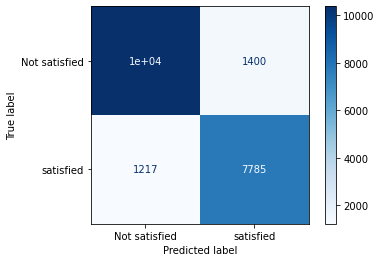

The validation sensitivity with Lasso LR is 0.8951.
The validation specificity with Lasso LR is 0.8476.


In [ ]:
# Confusion Matrix: train
conf_mat = confusion_matrix(y_train, y_pred_train)
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Not satisfied', 'satisfied'])

# disp.plot(cmap=plt.cm.Blues)
# plt.show()

tp, fp, fn, tn  = conf_mat[0,0], conf_mat[0,1], conf_mat[1,0], conf_mat[1,1]
sensitivity_lr = tp/(tp+fn)
specificity_lr = tn/(tn+fp)

scores_lr_tr.append(sensitivity_lr)
scores_lr_tr.append(specificity_lr)

scores_train['Base Model'] = scores_lr_tr

print(f"The train sensitivity with Lasso LR is {sensitivity_lr:.4f}.")
print(f"The train specificity with Lasso LR is {specificity_lr:.4f}.")

# Confusion Matrix: validation
conf_mat = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Not satisfied', 'satisfied'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

tp, fp, fn, tn  = conf_mat[0,0], conf_mat[0,1], conf_mat[1,0], conf_mat[1,1]
sensitivity_lr = tp/(tp+fn)
specificity_lr = tn/(tn+fp)

scores_lr_val.append(sensitivity_lr)
scores_lr_val.append(specificity_lr)

scores_val['Base Model'] = scores_lr_val

print(f"The validation sensitivity with Lasso LR is {sensitivity_lr:.4f}.")
print(f"The validation specificity with Lasso LR is {specificity_lr:.4f}.")

### Feature Selection using Lasso Logistic Regression

In [ ]:
predictors = X_train.columns
print(f'There are {len(np.where(baseModel.coef_ == 0)[0])} coefficients in the Lasso Regression that are equal to zero')
thresh = 0.05
print(f"The predictors that are the least useful to make the predictions are {predictors[np.where(np.abs(baseModel.coef_)<thresh)[1]]}") 
most_imp = predictors[int(np.where(baseModel.coef_ ==np.max(baseModel.coef_))[1])]
print(f"The most useful predictor for the Logistic Regression is {most_imp}")


There are 0 coefficients in the Lasso Regression that are equal to zero
The predictors that are the least useful to make the predictions are Index(['id', 'Flight Distance', 'Gate location', 'Food and drink',
       'Inflight entertainment', 'Gender_Male'],
      dtype='object')
The most useful predictor for the Logistic Regression is Online boarding


In [ ]:
# Dataframe with most important features and respective coefficients as per Lasso LR model
coefficients = np.abs(baseModel.coef_).reshape(-1,)
imp_cols = np.array(X_train.columns)[coefficients>thresh]
imp_coeffs = coefficients[coefficients>thresh]
imp_df = pd.DataFrame(imp_coeffs).rename(columns={0: 'Coefficient'})
imp_df = imp_df.set_index(imp_cols).sort_values(by=['Coefficient'], ascending = False)
imp_df

,Coefficient
Type of Travel_Personal Travel,2.724367
Customer Type_disloyal Customer,1.999642
Class_Eco Plus,0.844811
Class_Eco,0.734551
Online boarding,0.621875
Inflight wifi service,0.396600
Arrival Delay in Minutes,0.347431
Checkin service,0.329126
On-board service,0.302784
Leg room service,0.247297


### SVM

In [ ]:
"""clf = svm.SVC(kernel="rbf", probability=True)
clf.fit(X_train, y_train)

#Evaluating metrics for the train set
predictions_train = (clf.predict_proba(X_train)[:,1]>threshold).astype(int)

conf_train = confusion_matrix(y_train, predictions_train)
tp, fp, fn, tn  = conf_train[0,0], conf_train[0,1], conf_train[1,0], conf_train[1,1]
train_accuracy = (tp+tn) / (tp+tn+fp+fn)
train_sensitivity = tp/(tp+fn)
train_specificity = tn/(tn+fp)

print(f"Using SVM without tuning the hyperparameters, the overall accuracy for the train set is {train_accuracy:.4f}.")
print(f"Using SVM without tuning the hyperparameters, the overall sensitivity for the train set is {train_sensitivity:.4f}.")
print(f"Using SVM without tuning the hyperparameters, the overall specificity for the train set is {train_specificity:.4f}.")

scores_train['SVM'] = [train_accuracy, train_sensitivity, train_specificity]

#Evaluating metrics for the validation set
predictions = (clf.predict_proba(X_val)[:,1]>threshold).astype(int)

conf = confusion_matrix(y_val, predictions)
ConfusionMatrixDisplay(confusion_matrix = conf).plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix using (non-tuned) SVM')
plt.show()

tp, fp, fn, tn  = conf[0,0], conf[0,1], conf[1,0], conf[1,1]
accuracy = (tp+tn) / (tp+tn+fp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print(f"Using SVM without tuning the hyperparameters, the overall accuracy for the validation set is {accuracy:.4f}.")
print(f"Using SVM without tuning the hyperparameters, the overall sensitivity for the validation set is {sensitivity:.4f}.")
print(f"Using SVM without tuning the hyperparameters, the overall specificity for the validation set is {specificity:.4f}.")

scores_val['SVM'] = [accuracy, sensitivity, specificity]


"""

'clf = svm.SVC(kernel="rbf", probability=True)\nclf.fit(X_train, y_train)\n\n#Evaluating metrics for the train set\npredictions_train = (clf.predict_proba(X_train)[:,1]>threshold).astype(int)\n\nconf_train = confusion_matrix(y_train, predictions_train)\ntp, fp, fn, tn  = conf_train[0,0], conf_train[0,1], conf_train[1,0], conf_train[1,1]\ntrain_accuracy = (tp+tn) / (tp+tn+fp+fn)\ntrain_sensitivity = tp/(tp+fn)\ntrain_specificity = tn/(tn+fp)\n\nprint(f"Using SVM without tuning the hyperparameters, the overall accuracy for the train set is {train_accuracy:.4f}.")\nprint(f"Using SVM without tuning the hyperparameters, the overall sensitivity for the train set is {train_sensitivity:.4f}.")\nprint(f"Using SVM without tuning the hyperparameters, the overall specificity for the train set is {train_specificity:.4f}.")\n\nscores_train[\'SVM\'] = [train_accuracy, train_sensitivity, train_specificity]\n\n#Evaluating metrics for the validation set\npredictions = (clf.predict_proba(X_val)[:,1]>thre

### Decision Trees

#### Random forest

Using random forest without tuning the hyperparameters, the overall accuracy for the train set is 1.0000.
Using random forest without tuning the hyperparameters, the overall sensitivity for the train set is 1.0000.
Using random forest without tuning the hyperparameters, the overall specificity for the train set is 1.0000.


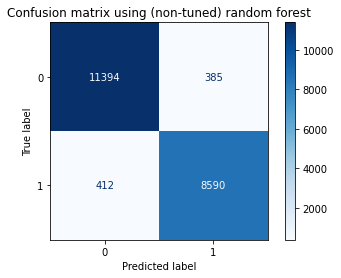

Using random forest without tuning the hyperparameters, the overall accuracy for the validation set is 0.9616.
Using random forest without tuning the hyperparameters, the overall sensitivity for the validation set is 0.9651.
Using random forest without tuning the hyperparameters, the overall specificity for the validation set is 0.9571.


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

#Evaluating metrics for the train set
predictions_train = (rfc.predict_proba(X_train)[:,1]>threshold).astype(int)

conf_train = confusion_matrix(y_train, predictions_train)
tp, fp, fn, tn  = conf_train[0,0], conf_train[0,1], conf_train[1,0], conf_train[1,1]
train_accuracy = (tp+tn) / (tp+tn+fp+fn)
train_sensitivity = tp/(tp+fn)
train_specificity = tn/(tn+fp)

print(f"Using random forest without tuning the hyperparameters, the overall accuracy for the train set is {train_accuracy:.4f}.")
print(f"Using random forest without tuning the hyperparameters, the overall sensitivity for the train set is {train_sensitivity:.4f}.")
print(f"Using random forest without tuning the hyperparameters, the overall specificity for the train set is {train_specificity:.4f}.")

scores_train['Random Forest'] = [train_accuracy, train_sensitivity, train_specificity]

#Evaluating metrics for the validation set
predictions = (rfc.predict_proba(X_val)[:,1]>threshold).astype(int)

conf = confusion_matrix(y_val, predictions)
ConfusionMatrixDisplay(confusion_matrix = conf).plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix using (non-tuned) random forest')
plt.show()

tp, fp, fn, tn  = conf[0,0], conf[0,1], conf[1,0], conf[1,1]
accuracy = (tp+tn) / (tp+tn+fp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print(f"Using random forest without tuning the hyperparameters, the overall accuracy for the validation set is {accuracy:.4f}.")
print(f"Using random forest without tuning the hyperparameters, the overall sensitivity for the validation set is {sensitivity:.4f}.")
print(f"Using random forest without tuning the hyperparameters, the overall specificity for the validation set is {specificity:.4f}.")

scores_val['Random Forest'] = [accuracy, sensitivity, specificity]

In [ ]:
"""#Tuning
rfc=RandomForestClassifier()

param_grid = { 
    'n_estimators': [100, 200, 400],
    'max_depth' : [20,30],
    'criterion' :['gini', 'entropy']
}


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train_big, y_train_big)


CV_rfc.best_params_"""
print({'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 200})

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 200}


Using random forest and tuning the hyperparameters, the overall accuracy for the train set is 1.0000.
Using random forest and tuning the hyperparameters, the overall sensitivity for the train set is 1.0000.
Using random forest and tuning the hyperparameters, the overall specificity for the train set is 1.0000.


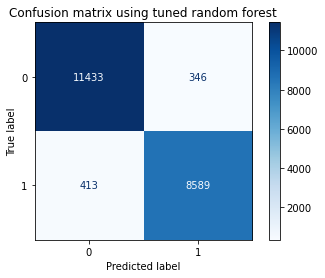

Using random forest and tuning the hyperparameters, the overall accuracy for the validation set is 0.9635.
Using random forest and tuning the hyperparameters, the overall sensitivity for the validation set is 0.9651.
Using random forest and tuning the hyperparameters, the overall specificity for the validation set is 0.9613.


In [ ]:
best_rfc = RandomForestClassifier(criterion="entropy", n_estimators=200, max_depth=30)
best_rfc.fit(X_train,y_train)

#Evaluating metrics for the train set
predictions_train = (best_rfc.predict_proba(X_train)[:,1]>threshold).astype(int)

conf_train = confusion_matrix(y_train, predictions_train)
tp, fp, fn, tn  = conf_train[0,0], conf_train[0,1], conf_train[1,0], conf_train[1,1]
train_accuracy = (tp+tn) / (tp+tn+fp+fn)
train_sensitivity = tp/(tp+fn)
train_specificity = tn/(tn+fp)

print(f"Using random forest and tuning the hyperparameters, the overall accuracy for the train set is {train_accuracy:.4f}.")
print(f"Using random forest and tuning the hyperparameters, the overall sensitivity for the train set is {train_sensitivity:.4f}.")
print(f"Using random forest and tuning the hyperparameters, the overall specificity for the train set is {train_specificity:.4f}.")

scores_train['Tuned Random Forest'] = [train_accuracy, train_sensitivity, train_specificity]

#Evaluating metrics for the validation set
predictions = (best_rfc.predict_proba(X_val)[:,1]>threshold).astype(int)

conf = confusion_matrix(y_val, predictions)
ConfusionMatrixDisplay(confusion_matrix = conf).plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix using tuned random forest')
plt.show()

tp, fp, fn, tn  = conf[0,0], conf[0,1], conf[1,0], conf[1,1]
accuracy = (tp+tn) / (tp+tn+fp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print(f"Using random forest and tuning the hyperparameters, the overall accuracy for the validation set is {accuracy:.4f}.")
print(f"Using random forest and tuning the hyperparameters, the overall sensitivity for the validation set is {sensitivity:.4f}.")
print(f"Using random forest and tuning the hyperparameters, the overall specificity for the validation set is {specificity:.4f}.")

scores_val['Tuned Random Forest'] = [accuracy, sensitivity, specificity]

#### Bagging 

Using bagging without tuning the hyperparameters, the overall accuracy for the train set is 0.9977.
Using bagging without tuning the hyperparameters, the overall sensitivity for the train set is 0.9982.
Using bagging without tuning the hyperparameters, the overall specificity for the train set is 0.9971.


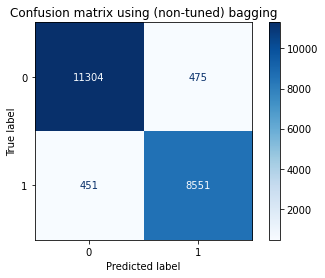

Using bagging without tuning the hyperparameters, the overall accuracy for the validation set is 0.9554.
Using bagging without tuning the hyperparameters, the overall sensitivity for the validation set is 0.9616.
Using bagging without tuning the hyperparameters, the overall specificity for the validation set is 0.9474.


In [ ]:
bagg = BaggingClassifier()
bagg.fit(X_train,y_train)

#Evaluating metrics for the train set
predictions_train = (bagg.predict_proba(X_train)[:,1]>threshold).astype(int)

conf_train = confusion_matrix(y_train, predictions_train)
tp, fp, fn, tn  = conf_train[0,0], conf_train[0,1], conf_train[1,0], conf_train[1,1]
train_accuracy = (tp+tn) / (tp+tn+fp+fn)
train_sensitivity = tp/(tp+fn)
train_specificity = tn/(tn+fp)

print(f"Using bagging without tuning the hyperparameters, the overall accuracy for the train set is {train_accuracy:.4f}.")
print(f"Using bagging without tuning the hyperparameters, the overall sensitivity for the train set is {train_sensitivity:.4f}.")
print(f"Using bagging without tuning the hyperparameters, the overall specificity for the train set is {train_specificity:.4f}.")

scores_train['Bagging'] = [train_accuracy, train_sensitivity, train_specificity]

#Evaluating metrics for the validation set
predictions = (bagg.predict_proba(X_val)[:,1]>threshold).astype(int)

conf = confusion_matrix(y_val, predictions)
ConfusionMatrixDisplay(confusion_matrix = conf).plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix using (non-tuned) bagging')
plt.show()

tp, fp, fn, tn  = conf[0,0], conf[0,1], conf[1,0], conf[1,1]
accuracy = (tp+tn) / (tp+tn+fp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print(f"Using bagging without tuning the hyperparameters, the overall accuracy for the validation set is {accuracy:.4f}.")
print(f"Using bagging without tuning the hyperparameters, the overall sensitivity for the validation set is {sensitivity:.4f}.")
print(f"Using bagging without tuning the hyperparameters, the overall specificity for the validation set is {specificity:.4f}.")

scores_val['Bagging'] = [accuracy, sensitivity, specificity]

In [ ]:
"""param_grid = {
    'base_estimator__max_depth' : [20,30],
    'max_samples' : [0.1, 0.2, 0.5]
}

CV_bagg = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(criterion="entropy"),n_estimators = 200),param_grid, cv = 3)
                       
CV_bagg.fit(X_train, y_train)


CV_bagg.best_params_"""
print({'base_estimator__max_depth': 30, 'max_samples': 0.5})

{'base_estimator__max_depth': 30, 'max_samples': 0.5}


Using bagging and tuning the hyperparameters, the overall accuracy for the train set is 0.9948.
Using bagging and tuning the hyperparameters, the overall sensitivity for the train set is 0.9962.
Using bagging and tuning the hyperparameters, the overall specificity for the train set is 0.9931.


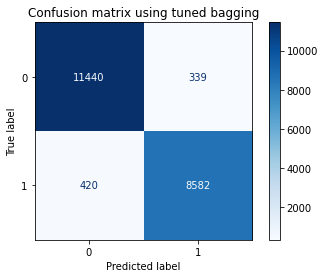

Using bagging and tuning the hyperparameters, the overall accuracy for the validation set is 0.9635.
Using bagging and tuning the hyperparameters, the overall sensitivity for the validation set is 0.9646.
Using bagging and tuning the hyperparameters, the overall specificity for the validation set is 0.9620.


In [ ]:
best_bagg = BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=30),n_estimators=200,max_samples=0.5)
best_bagg.fit(X_train,y_train)

#Evaluating metrics for the train set
predictions_train = (best_bagg.predict_proba(X_train)[:,1]>threshold).astype(int)

conf_train = confusion_matrix(y_train, predictions_train)
tp, fp, fn, tn  = conf_train[0,0], conf_train[0,1], conf_train[1,0], conf_train[1,1]
train_accuracy = (tp+tn) / (tp+tn+fp+fn)
train_sensitivity = tp/(tp+fn)
train_specificity = tn/(tn+fp)

print(f"Using bagging and tuning the hyperparameters, the overall accuracy for the train set is {train_accuracy:.4f}.")
print(f"Using bagging and tuning the hyperparameters, the overall sensitivity for the train set is {train_sensitivity:.4f}.")
print(f"Using bagging and tuning the hyperparameters, the overall specificity for the train set is {train_specificity:.4f}.")

scores_train['Tuned Bagging'] = [train_accuracy, train_sensitivity, train_specificity]

#Evaluating metrics for the validation set
predictions = (best_bagg.predict_proba(X_val)[:,1]>threshold).astype(int)

conf = confusion_matrix(y_val, predictions)
ConfusionMatrixDisplay(confusion_matrix = conf).plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix using tuned bagging')
plt.show()

tp, fp, fn, tn  = conf[0,0], conf[0,1], conf[1,0], conf[1,1]
accuracy = (tp+tn) / (tp+tn+fp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print(f"Using bagging and tuning the hyperparameters, the overall accuracy for the validation set is {accuracy:.4f}.")
print(f"Using bagging and tuning the hyperparameters, the overall sensitivity for the validation set is {sensitivity:.4f}.")
print(f"Using bagging and tuning the hyperparameters, the overall specificity for the validation set is {specificity:.4f}.")

scores_val['Tuned Bagging'] = [accuracy, sensitivity, specificity]

#### Boosting

Using boosting without tuning the hyperparameters, the overall accuracy for the train set is 0.9422.
Using boosting without tuning the hyperparameters, the overall sensitivity for the train set is 0.9474.
Using boosting without tuning the hyperparameters, the overall specificity for the train set is 0.9353.


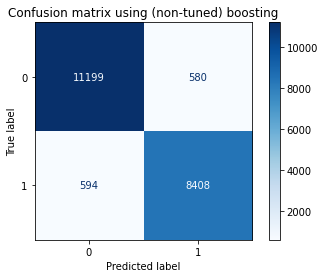

Using boosting without tuning the hyperparameters, the overall accuracy for the validation set is 0.9435.
Using boosting without tuning the hyperparameters, the overall sensitivity for the validation set is 0.9496.
Using boosting without tuning the hyperparameters, the overall specificity for the validation set is 0.9355.


In [ ]:
boost = GradientBoostingClassifier()
boost.fit(X_train,y_train)

#Evaluating metrics for the train set
predictions_train = (boost.predict_proba(X_train)[:,1]>threshold).astype(int)

conf_train = confusion_matrix(y_train, predictions_train)
tp, fp, fn, tn  = conf_train[0,0], conf_train[0,1], conf_train[1,0], conf_train[1,1]
train_accuracy = (tp+tn) / (tp+tn+fp+fn)
train_sensitivity = tp/(tp+fn)
train_specificity = tn/(tn+fp)

print(f"Using boosting without tuning the hyperparameters, the overall accuracy for the train set is {train_accuracy:.4f}.")
print(f"Using boosting without tuning the hyperparameters, the overall sensitivity for the train set is {train_sensitivity:.4f}.")
print(f"Using boosting without tuning the hyperparameters, the overall specificity for the train set is {train_specificity:.4f}.")

scores_train['Boosting'] = [train_accuracy, train_sensitivity, train_specificity]

#Evaluating metrics for the validation set
predictions = (boost.predict_proba(X_val)[:,1]>threshold).astype(int)

conf = confusion_matrix(y_val, predictions)
ConfusionMatrixDisplay(confusion_matrix = conf).plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix using (non-tuned) boosting')
plt.show()

tp, fp, fn, tn  = conf[0,0], conf[0,1], conf[1,0], conf[1,1]
accuracy = (tp+tn) / (tp+tn+fp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print(f"Using boosting without tuning the hyperparameters, the overall accuracy for the validation set is {accuracy:.4f}.")
print(f"Using boosting without tuning the hyperparameters, the overall sensitivity for the validation set is {sensitivity:.4f}.")
print(f"Using boosting without tuning the hyperparameters, the overall specificity for the validation set is {specificity:.4f}.")

scores_val['Boosting'] = [accuracy, sensitivity, specificity]

In [ ]:
#Tuning
"""
boost=GradientBoostingClassifier(n_estimators=200)

param_grid = { 
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.35, 0.4, 0.45, 0.5, 0.6, 1, 5]
}


CV_boost = GridSearchCV(estimator=boost, param_grid=param_grid, cv= 3)
CV_boost.fit(X_train, y_train)


CV_boost.best_params_
"""
print({'learning_rate': 0.4})

{'learning_rate': 0.4}


Using boosting and tuning the hyperparameters, the overall accuracy for the train set is 0.9650.
Using boosting and tuning the hyperparameters, the overall sensitivity for the train set is 0.9673.
Using boosting and tuning the hyperparameters, the overall specificity for the train set is 0.9621.


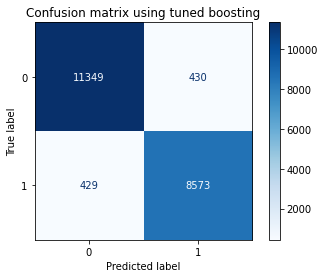

Using boosting and tuning the hyperparameters, the overall accuracy for the validation set is 0.9587.
Using boosting and tuning the hyperparameters, the overall sensitivity for the validation set is 0.9636.
Using boosting and tuning the hyperparameters, the overall specificity for the validation set is 0.9522.


In [ ]:
best_boost = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.4)
best_boost.fit(X_train,y_train)

#Evaluating metrics for the train set
predictions_train = (best_boost.predict_proba(X_train)[:,1]>threshold).astype(int)

conf_train = confusion_matrix(y_train, predictions_train)
tp, fp, fn, tn  = conf_train[0,0], conf_train[0,1], conf_train[1,0], conf_train[1,1]
train_accuracy = (tp+tn) / (tp+tn+fp+fn)
train_sensitivity = tp/(tp+fn)
train_specificity = tn/(tn+fp)

print(f"Using boosting and tuning the hyperparameters, the overall accuracy for the train set is {train_accuracy:.4f}.")
print(f"Using boosting and tuning the hyperparameters, the overall sensitivity for the train set is {train_sensitivity:.4f}.")
print(f"Using boosting and tuning the hyperparameters, the overall specificity for the train set is {train_specificity:.4f}.")

scores_train['Tuned Boosting'] = [train_accuracy, train_sensitivity, train_specificity]

#Evaluating metrics for the validation set
predictions = (best_boost.predict_proba(X_val)[:,1]>threshold).astype(int)

conf = confusion_matrix(y_val, predictions)
ConfusionMatrixDisplay(confusion_matrix = conf).plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix using tuned boosting')
plt.show()

tp, fp, fn, tn  = conf[0,0], conf[0,1], conf[1,0], conf[1,1]
accuracy = (tp+tn) / (tp+tn+fp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print(f"Using boosting and tuning the hyperparameters, the overall accuracy for the validation set is {accuracy:.4f}.")
print(f"Using boosting and tuning the hyperparameters, the overall sensitivity for the validation set is {sensitivity:.4f}.")
print(f"Using boosting and tuning the hyperparameters, the overall specificity for the validation set is {specificity:.4f}.")

scores_val['Tuned Boosting'] = [accuracy, sensitivity, specificity]

### Feedforward Neural Network

**For the neural network model below, we will use the 18 features selected during our feature selection above. This will allow us to reduce training time as well as decrease overfitting to the training data.**

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(X_train_select.shape[1],), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
learning_rate = 0.0001
epochs = 40
batch_size = 512
optimizer = Adam()
cb = [tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=1,
    mode="min",
    restore_best_weights=True,
)]
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer,
	metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               9728      
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
history = model.fit(X_train_select, y_train, validation_data=(X_val_select, y_val),
	epochs=epochs, batch_size = batch_size, callbacks = [cb])

Epoch 1/40
163/163 [==============================] - 4s 22ms/step - loss: 0.3160 - accuracy: 0.8598 - val_loss: 0.1833 - val_accuracy: 0.9237
Epoch 2/40
163/163 [==============================] - 3s 21ms/step - loss: 0.1872 - accuracy: 0.9208 - val_loss: 0.1450 - val_accuracy: 0.9393
Epoch 3/40
163/163 [==============================] - 3s 21ms/step - loss: 0.1605 - accuracy: 0.9334 - val_loss: 0.1387 - val_accuracy: 0.9452
Epoch 4/40
163/163 [==============================] - 3s 21ms/step - loss: 0.1477 - accuracy: 0.9371 - val_loss: 0.1234 - val_accuracy: 0.9498
Epoch 5/40
163/163 [==============================] - 3s 21ms/step - loss: 0.1407 - accuracy: 0.9405 - val_loss: 0.1259 - val_accuracy: 0.9475
Epoch 6/40
163/163 [==============================] - 3s 21ms/step - loss: 0.1315 - accuracy: 0.9450 - val_loss: 0.1169 - val_accuracy: 0.9534
Epoch 7/40
163/163 [==============================] - 6s 35ms/step - loss: 0.1260 - accuracy: 0.9462 - val_loss: 0.1366 - val_accuracy: 0.9433

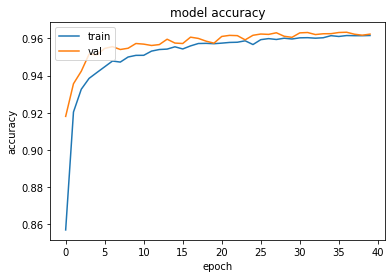

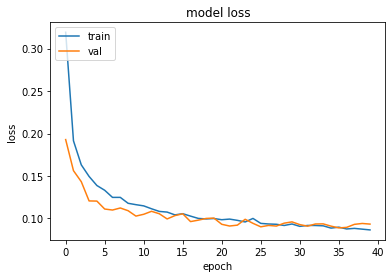

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The train accuracy with Neural Net is 0.9665
The train sensitivity with Neural Net is 0.9568.
The train specificity with Neural Net is 0.9799.


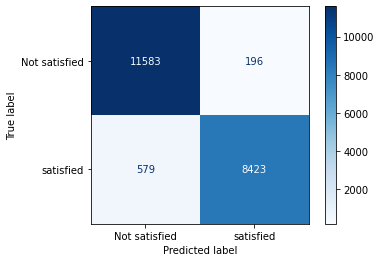

The validation accuracy with Neural Net is 0.9627
The validation sensitivity with Neural Net is 0.9524.
The validation specificity with Neural Net is 0.9773.


In [ ]:
y_pred_val = (model.predict(X_val_select) > threshold).astype(int)
y_pred_train = (model.predict(X_train_select) > threshold).astype(int)

# Confusion Matrix: train
conf_mat = confusion_matrix(y_train, y_pred_train)
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Not satisfied', 'satisfied'])

# disp.plot(cmap=plt.cm.Blues)
# plt.show()
scores_lr_tr = []
tp, fp, fn, tn  = conf_mat[0,0], conf_mat[0,1], conf_mat[1,0], conf_mat[1,1]
sensitivity_lr = tp/(tp+fn)
specificity_lr = tn/(tn+fp)
accuracy = (tp+tn) / (tp+tn+fp+fn)

scores_lr_tr.append(accuracy)
scores_lr_tr.append(sensitivity_lr)
scores_lr_tr.append(specificity_lr)

scores_train['Neural Network'] = scores_lr_tr

print(f"The train accuracy with Neural Net is {accuracy:.4f}")
print(f"The train sensitivity with Neural Net is {sensitivity_lr:.4f}.")
print(f"The train specificity with Neural Net is {specificity_lr:.4f}.")

# Confusion Matrix: validation
conf_mat = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Not satisfied', 'satisfied'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

scores_lr_val = []
tp, fp, fn, tn  = conf_mat[0,0], conf_mat[0,1], conf_mat[1,0], conf_mat[1,1]
sensitivity_lr = tp/(tp+fn)
specificity_lr = tn/(tn+fp)
accuracy = (tp+tn) / (tp+tn+fp+fn)

scores_lr_val.append(accuracy)
scores_lr_val.append(sensitivity_lr)
scores_lr_val.append(specificity_lr)

scores_val['Neural Network'] = scores_lr_val
print(f"The validation accuracy with Neural Net is {accuracy:.4f}")
print(f"The validation sensitivity with Neural Net is {sensitivity_lr:.4f}.")
print(f"The validation specificity with Neural Net is {specificity_lr:.4f}.")

## Results

In [ ]:
# summary of training results

results_df_train = pd.DataFrame.from_dict(scores_train,orient='index').transpose().rename(index={0: 'Accuracy', 1: 'Sensitivity', 2: 'Specificity'})

results_df_train

,Base Model,Random Forest,Tuned Random Forest,Bagging,Tuned Bagging,Boosting,Tuned Boosting,Neural Network
Accuracy,0.868484,0.999988,1.0,0.997738,0.994959,0.942194,0.964980,0.966507
Sensitivity,0.889856,1.000000,1.0,0.998398,0.995835,0.947298,0.966593,0.956814
Specificity,0.841915,0.999972,1.0,0.996888,0.993829,0.935554,0.962871,0.979908


In [ ]:
# summary of validation results

results_df_val = pd.DataFrame.from_dict(scores_val,orient='index').transpose().rename(index={0: 'Accuracy', 1: 'Sensitivity', 2: 'Specificity'})

results_df_val

,Base Model,Random Forest,Tuned Random Forest,Bagging,Tuned Bagging,Boosting,Tuned Boosting,Neural Network
Accuracy,0.874068,0.962754,0.963524,0.954911,0.963765,0.943939,0.959290,0.962706
Sensitivity,0.895118,0.964464,0.964433,0.959640,0.964448,0.949670,0.963459,0.952393
Specificity,0.847502,0.960488,0.962315,0.948704,0.962855,0.936407,0.953817,0.977260


**Therefore, the best model found is tuned bagging. We will evaluate its performance on the test set.**

In [ ]:
predictions_test = (best_bagg.predict_proba(X_test)[:,1]>threshold).astype(int)

conf_test = confusion_matrix(y_test, predictions_test)
tp, fp, fn, tn  = conf_test[0,0], conf_test[0,1], conf_test[1,0], conf_test[1,1]
test_accuracy = (tp+tn) / (tp+tn+fp+fn)
test_sensitivity = tp/(tp+fn)
test_specificity = tn/(tn+fp)

print(f"Using the best model (tuned bagging), the overall accuracy for the test set is {test_accuracy:.4f}.")
print(f"Using the best model (tuned bagging), the overall sensitivity for the test set is {test_sensitivity:.4f}.")
print(f"Using the best model (tuned bagging), the overall specificity for the test set is {test_specificity:.4f}.")

Using the best model (tuned bagging), the overall accuracy for the test set is 0.9617.
Using the best model (tuned bagging), the overall sensitivity for the test set is 0.9628.
Using the best model (tuned bagging), the overall specificity for the test set is 0.9601.
